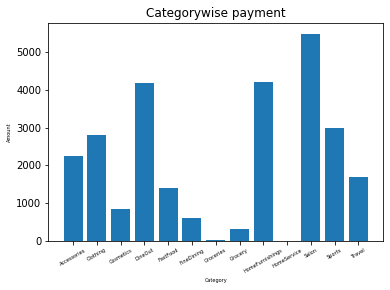

Accessories - 2250

Clothing - 2798.02

Cosmetics - 850

DineOut - 4193.0

FastFood - 1385.36

FineDining - 598

Groceries - 4

Grocery - 297

HomeFurnishings - 4199.0

HomeService - 0

Salon - 5493.8

Sports - 2979

Travel - 1680.0



In [91]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import difflib
label = []
Amount = []
Amount1 = []
company = []
date = []
counter = 0
def parser(path):
    list1 = os.listdir(path+"/")
    for item in list1:
        if item.endswith(".txt"):
            #print(item);
            lab = item.partition("-")[0]
            
            if lab not in label:
                label.append(lab)
                ind1 = label.index(lab)
                Amount.insert(ind1,0)
            #print(label)
            f=open(path+"/"+item, 'r')
            try:
                contents =f.readlines()
                flag = 1
                flag1 = 1
                amt=[]
                amt1=[]
                for x in contents:
                    #print(x)
                    if flag == 1 :
                        #print("Company name is "+ x);
                        company.insert(counter,x);
                        flag = 0;
                    try: 
                        datevar = re.findall("\d+/\d+/\d+",x)
                    except:
                        print("date error")
                    if [] != datevar:
                        print();
                        date.insert(counter,datevar[0])
                        #print("Date Created "+ datevar[0])
                    
                        
                    try:
                        pric = re.findall("[-+]?[0-9|\,]*\.+[0-9]+",x)
                        for pri in pric:
                            pri = pri.replace(',', '')
                            #print(pri)
                            c = float(pri)
                            amt1.append(c)
                    
                    except:
                        print("sdf")
                    #print(words)
                    words = x.split()
                    for i in words:
                        #print(i)
                        lett = "";
                        if "Amount" in x:
                            #print("Enter");
                            for letter in i:
                                if(letter.isdigit()):
                                    lett = lett + letter;
                                if letter == ".":
                                    break
                            if lett != "" :
                                #print("Amount is "+lett)
                                c = int(lett,10);
                                #ind1 = x.find("Amount")
                                #ind2 = x.find(lett)
                                #if ind1<ind2:
                                amt.append(c);    
                        elif "Total" in x:
                            #print("Enter")
                            for letter in i:
                                if(letter.isdigit()):
                                    lett = lett + letter
                                if letter == ".":
                                    break
                            if lett != "":
                                #print("Total is : "+lett)
                                c = int(lett,10);
                                #ind1 = x.find("Total")
                                #ind2 = x.find(lett)
                                #if ind1<ind2:
                                amt.append(c);
                        else:
                            i = i.lower()
                            sequence = difflib.SequenceMatcher(isjunk=None,a=i,b="amount")
                            difference = sequence.ratio()*100;
                            difference = round(difference,1);
                            if difference >= 83 :
                                inde = x.find(i);
                                inde = inde + len(i);
                                st = x[inde+1:len(x)]
                                #print(st)
                                
                                for letter in st:
                                    if(letter.isdigit()):
                                        lett = lett + letter
                                    if letter == ".":
                                        break;
                                if lett != "":
                                    c = int(lett,10);
                                    amt.append(c);
                            sequence1 = difflib.SequenceMatcher(isjunk=None,a=i,b="total")
                            difference1 = sequence1.ratio()*100;
                            difference1 = round(difference1,1);
                            if difference1 >= 83 :
                                inde1 = x.find(i);
                                inde1 = inde1 + len(i);
                                st1 = x[inde1+1:len(x)]
                                #print(st1)
                                
                                for letter in st1:
                                    if(letter.isdigit()):
                                        lett = lett + letter
                                    if letter == ".":
                                        break;
                                if lett != "":
                                    c = int(lett,10);
                                    amt.append(c);
                             
                        
#                 if amt!=[]:
#                     val = max(amt);
#                     print(val);
#                     if val1<val:
#               Amount[ind] = val;
                if amt!=[] :
#                     print(amt)
                    valmax = max(amt);
                    valmax1 = max(amt1);
                    #print(lab)
                    #print(amt)
                    #print(valmax)
                    #print(valmax1)
                    
                    if valmax == 0.0:
                        valmax = valmax1;
                    elif valmax > valmax1:
                        valmax = valmax1;
                    ind = label.index(lab);                                                            
                    val1 = Amount[ind];
                    Amount[ind] = val1 + valmax ;
                    #print(Amount[ind])
                elif amt1!=[]:
                    valmax = max(amt1);
                    #print(lab)
                    #print(amt)
                    #print(valmax)
                    ind = label.index(lab);                                                            
                    val1 = Amount[ind];
                    Amount[ind] = val1 + valmax ;
                    
                    
                    
                                
            except:
                print ("An Exception Occured")
     
    
def plot():
    #print(Amount)
    #print(label)    
    #print(company)
    #print(date)
    index = np.arange(len(label))
    plt.bar(index, Amount)
    plt.xlabel('Category', fontsize=5)
    plt.ylabel('Amount', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Categorywise payment')
    plt.show()
    cnt = 0;
    for i in label:
        print(i + " - "+ str(Amount[cnt]));
        print();
        cnt = cnt + 1;
        
parser("results-bills")
plot()